# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from api_keys import weather_api_key


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#for c in cities:
    #print(c)

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
api_key = weather_api_key
queryURL = f"{url}appid={api_key}&units={units}&q="


In [5]:
#build query URL and test it
city='toledo'
queryURL += city

weather = requests.get(queryURL)
weatherJSON = weather.json()

weatherJSON #   ['coord']['lat'], ['coord']['lon'], ['main']['temp']

{'coord': {'lon': -4, 'lat': 39.8333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 48.31,
  'feels_like': 41.29,
  'temp_min': 48.31,
  'temp_max': 48.31,
  'pressure': 1027,
  'humidity': 59,
  'sea_level': 1027,
  'grnd_level': 952},
 'visibility': 10000,
 'wind': {'speed': 20.51, 'deg': 344, 'gust': 34.49},
 'clouds': {'all': 0},
 'dt': 1733629112,
 'sys': {'type': 2,
  'id': 2035087,
  'country': 'ES',
  'sunrise': 1733642709,
  'sunset': 1733676674},
 'timezone': 3600,
 'id': 2510407,
 'name': 'Toledo',
 'cod': 200}

In [6]:
#build a dataframe of city names and current temperatures, latitudes, and longitudes
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

temperatures = []
lats = []
lons = []
cityName = []
tempMax = []
tempMin = []
cloudiness = []
humidity = []
country = []
windSpeed = []
date = []
queryURL = f"{url}appid={api_key}&units={units}&q="

for city in cities:
    try:
        time.sleep(1) #pauses the program for 1 second
        
        #create thenew query string
        cityQuery = f"{queryURL}{city}"

        #call to requests and jsonify the response
        response = requests.get(cityQuery).json()

        # extract the temperatures and add to the temperatures list
        temperatures.append(response['main']['temp'])
        tempMax.append(response['main']['temp_max'])
        tempMin.append(response['main']['temp_min'])

        #extract humidity from open weather
        humidity.append(response['main']['humidity'])

        #extract clouds from open weather
        cloudiness.append(response['clouds']['all'])

        #extract windspeed from open weather
        windSpeed.append(response['wind']['speed'])
        
        #extract the lattitude and add to the temperature list
        lats.append(response['coord']['lat'])

        #extract the longitude and add to the longitudes list
        lons.append(response['coord']['lon'])

        #extract city name from open weather
        cityName.append(response['name'])

        #extract country name from open weather
        country.append(response['sys']['country'])

        #extract the date
        date.append(response['dt'])
                  

    except:
        pass




# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
      

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
#build the dataframe

cityDataDF = pd.DataFrame(
    {"City Name": cityName,
     "Latitude": lats,
     "Longitude": lons,
     "Temperature": temperatures,
     "Max Temp": tempMax,
     "Min Temp": tempMin,
     "Humidity": humidity,
     "Cloudiness": cloudiness,
     "Wind Speed": windSpeed,
     "Country": country,
     #"Date": date
     
    }
)

cityDataDF

,City Name,Latitude,Longitude,Temperature,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country
0,Kattivākkam,13.2167,80.3167,82.31,83.10,80.69,88,100,0.78,IN
1,Qaqortoq,60.7167,-46.0333,30.74,30.74,30.74,97,100,10.76,GL
2,Cole Harbour,44.6724,-63.4751,16.93,17.92,14.83,80,0,1.01,CA
3,Waitangi,-43.9535,-176.5597,56.37,56.37,56.37,89,80,18.34,NZ
4,Dudinka,69.4058,86.1778,-12.42,-12.42,-12.42,100,100,7.67,RU
...,...,...,...,...,...,...,...,...,...,...
557,Dubrowna,54.5733,30.6906,33.03,33.03,33.03,98,100,11.16,BY
558,Emerald,-23.5333,148.1667,99.34,99.34,99.34,34,2,4.27,AU
559,Iron River,46.0927,-88.6423,33.49,33.49,33.49,86,46,10.18,US
560,Foumbot,5.5079,10.6356,64.90,64.90,64.90,50,99,0.72,CM


In [10]:
# Export the City_Data into a csv
cityDataDF.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
cityDataDF = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
cityDataDF.head()

,City Name,Latitude,Longitude,Temperature,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,,,
0,Kattivākkam,13.2167,80.3167,82.31,83.10,80.69,88,100,0.78,IN
1,Qaqortoq,60.7167,-46.0333,30.74,30.74,30.74,97,100,10.76,GL
2,Cole Harbour,44.6724,-63.4751,16.93,17.92,14.83,80,0,1.01,CA
3,Waitangi,-43.9535,-176.5597,56.37,56.37,56.37,89,80,18.34,NZ
4,Dudinka,69.4058,86.1778,-12.42,-12.42,-12.42,100,100,7.67,RU


In [12]:
cityDataDF.dtypes

City Name       object
Latitude       float64
Longitude      float64
Temperature    float64
Max Temp       float64
Min Temp       float64
Humidity         int64
Cloudiness       int64
Wind Speed     float64
Country         object
dtype: object

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

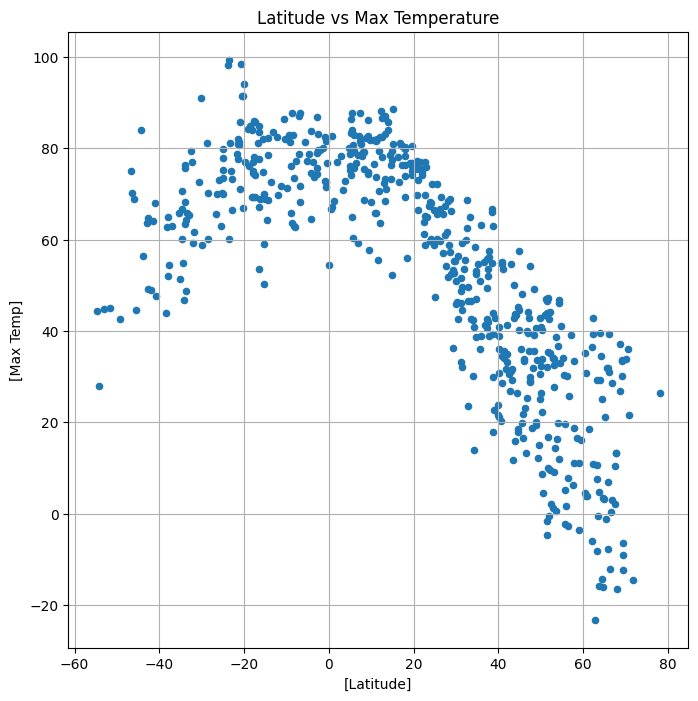

In [13]:
# Build scatter plot for latitude vs. temperature
cityDataDF.plot(kind='scatter', x=['Latitude'], y=['Max Temp'], grid=True, figsize=(8,8), title="Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-squared is: 0.5246192421943173


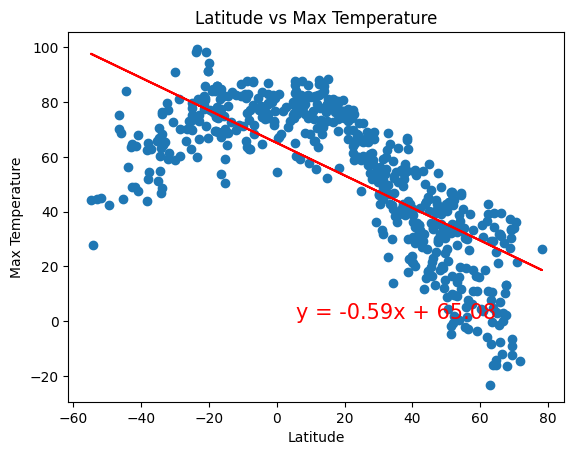

In [14]:
# Define a function to create Linear Regression plots
x_values = cityDataDF['Latitude']
y_values = cityDataDF['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig1A.png")

plt.show()

#### Latitude Vs. Humidity

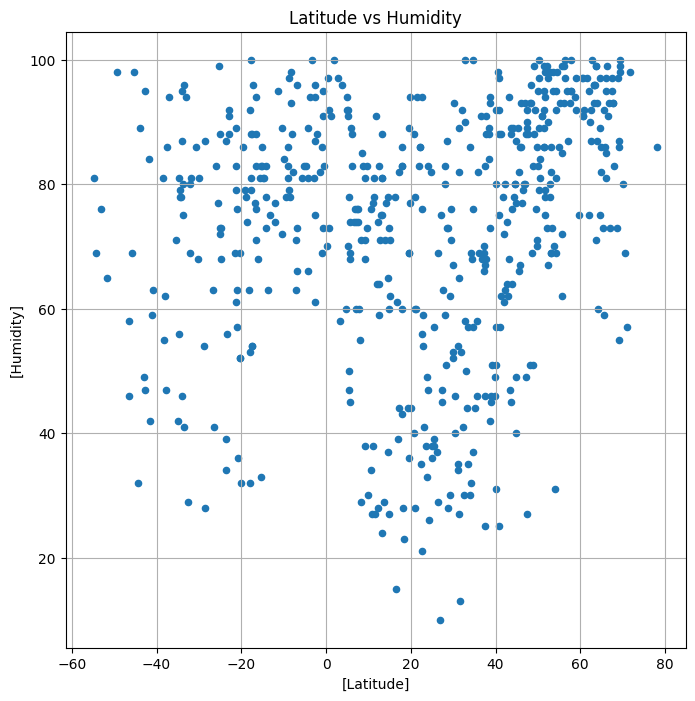

In [15]:
# Build scatter plot for latitude vs. temperature
cityDataDF.plot(kind='scatter', x=['Latitude'], y=['Humidity'], grid=True, figsize=(8,8), title="Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

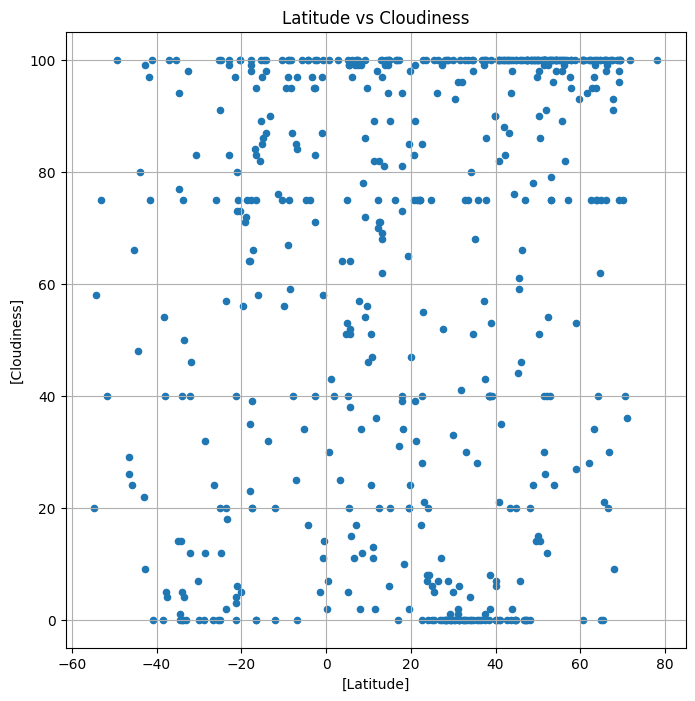

In [16]:
# Build scatter plot for latitude vs. temperature
cityDataDF.plot(kind='scatter', x=['Latitude'], y=['Cloudiness'], grid=True, figsize=(8,8), title="Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

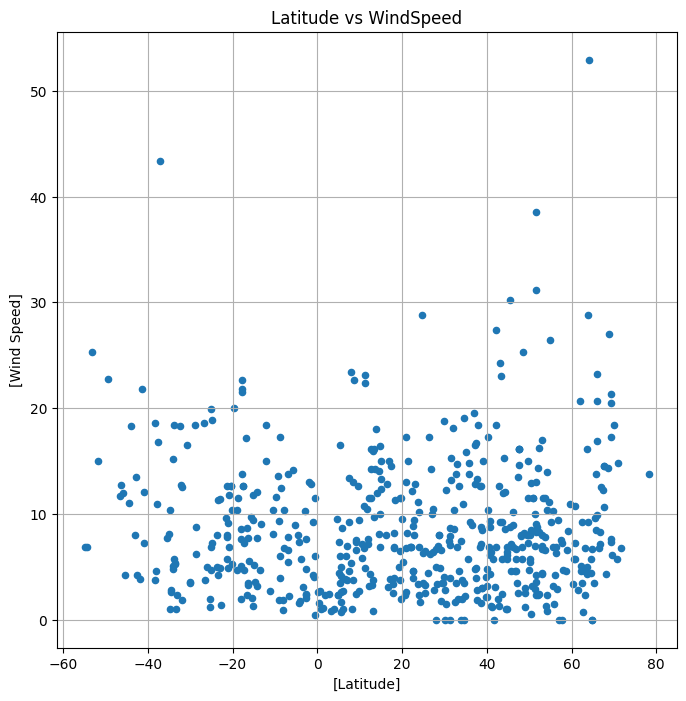

In [17]:
# Build scatter plot for latitude vs. temperature
cityDataDF.plot(kind='scatter', x=['Latitude'], y=['Wind Speed'], grid=True, figsize=(8,8), title="Latitude vs WindSpeed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
northernHemisphere = cityDataDF[cityDataDF['Latitude'] >= 0]

print(northernHemisphere.shape)
northernHemisphere.head()

(404, 10)


,City Name,Latitude,Longitude,Temperature,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,,,
0,Kattivākkam,13.2167,80.3167,82.31,83.10,80.69,88,100,0.78,IN
1,Qaqortoq,60.7167,-46.0333,30.74,30.74,30.74,97,100,10.76,GL
2,Cole Harbour,44.6724,-63.4751,16.93,17.92,14.83,80,0,1.01,CA
4,Dudinka,69.4058,86.1778,-12.42,-12.42,-12.42,100,100,7.67,RU
6,Ribeira Grande,38.5167,-28.7000,64.80,66.78,64.80,88,40,12.66,PT


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southernHemisphere = cityDataDF[cityDataDF['Latitude'] <= 0]
print(southernHemisphere.shape)
southernHemisphere.head()

(158, 10)


,City Name,Latitude,Longitude,Temperature,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,,,
3,Waitangi,-43.9535,-176.5597,56.37,56.37,56.37,89,80,18.34,NZ
5,Ancud,-41.8697,-73.8203,48.90,48.90,48.90,84,97,3.89,CL
8,Santa Cruz de la Sierra,-17.8000,-63.1667,74.66,74.66,74.66,100,75,13.80,BO
9,Punta Arenas,-53.1500,-70.9167,44.71,44.71,44.11,76,75,25.32,CL
13,Adamstown,-25.0660,-130.1015,73.42,73.42,73.42,72,91,19.95,PN


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7488882091232303


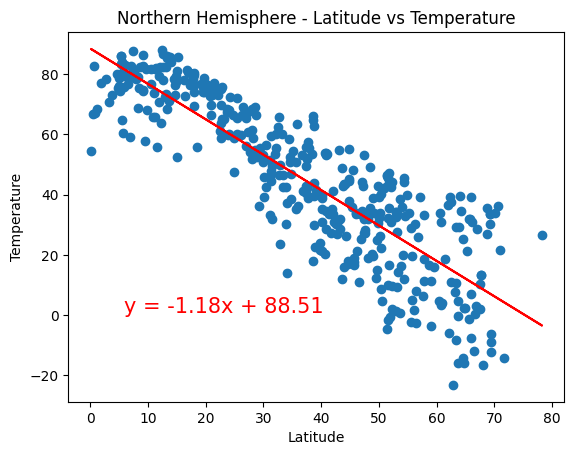

In [20]:
# Define a function to create Linear Regression plots northerin hemisphere lat vs temp
x_values = northernHemisphere['Latitude']
y_values = northernHemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere - Latitude vs Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/NHLatTemp.png")

plt.show()


The r-squared is: 0.3197611151140197


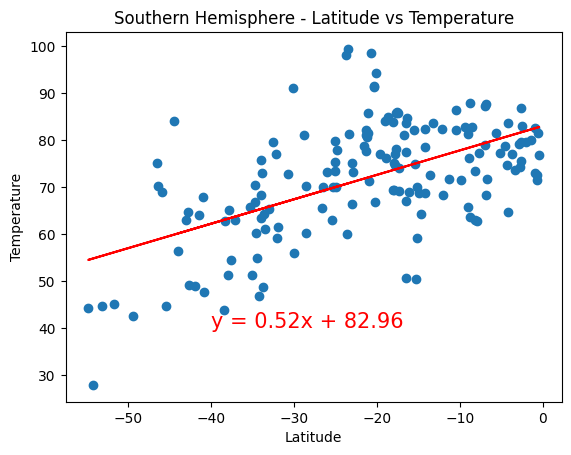

In [21]:
# Define a function to create Linear Regression plots southernhemisphere lat vs temp
x_values = southernHemisphere['Latitude']
y_values = southernHemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq1,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere - Latitude vs Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/SHLatTemp.png")

plt.show()


The r-squared is: 0.7443034085627126


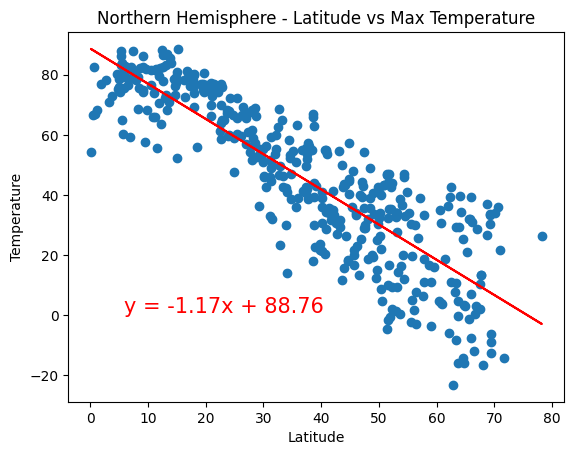

In [22]:
# Define a function to create Linear Regression plots for northerin hemisphere lat vs max temp
x_values = northernHemisphere['Latitude']
y_values = northernHemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere - Latitude vs Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/NHLatMaxTemp.png")

plt.show()


The r-squared is: 0.31863129322314127


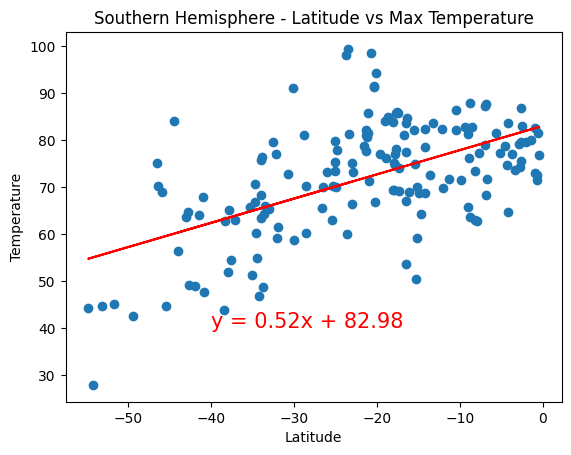

In [23]:
# Define a function to create Linear Regression plots for southern hemisphere lat vs max temp
x_values = southernHemisphere['Latitude']
y_values = southernHemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere - Latitude vs Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/SHLatMaxTemp.png")

plt.show()


**Discussion about the linear relationship:** Both the temperature and the max temperature data sets have a very strong correlation to lattitude, specifically the closer the lattitude is to zero, the higher the max temperature.  In review of the northern hemisphere vs the southern hemisphere, there is a higher r^2 value for the northern hemisphere (.73 vs .39) which indicates a better fit of the regression.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15070745325458734


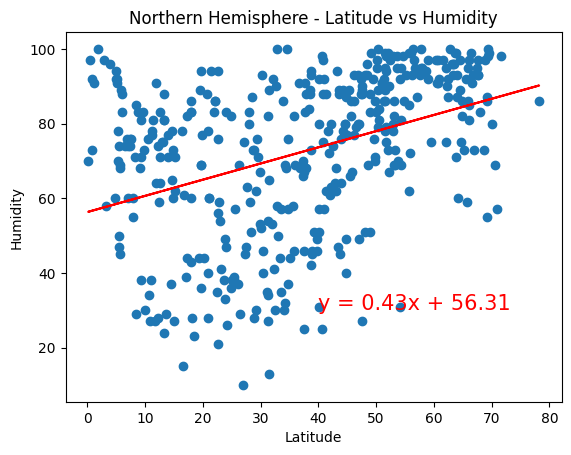

In [24]:
# Northern Hemisphere

x_values = northernHemisphere['Latitude']
y_values = northernHemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Latitude vs Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/NHLatHum.png")

plt.show()


The r-squared is: 0.0743696887101756


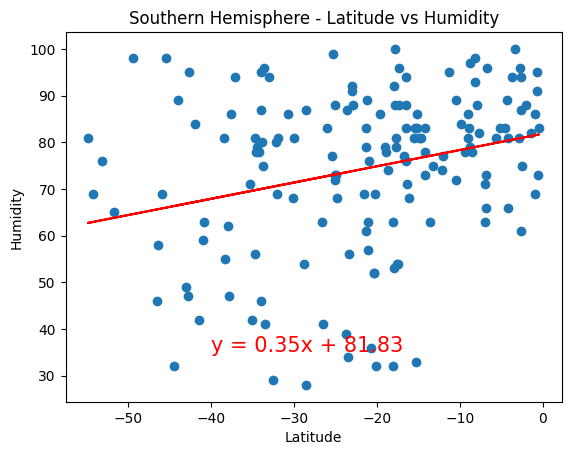

In [25]:
# Southern Hemisphere
x_values = southernHemisphere['Latitude']
y_values = southernHemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Latitude vs Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/SHLatHum.png")

plt.show()

**Discussion about the linear relationship:** Visual review of these scatter plots indicate a lot of variation and spread. The R^2 values are low (.13 and .15) which indicates alot of variation bewtween the regression line and the datapoints.  Based on this data it is unclear whether latitude and humidity are strongly correlated.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.052908963866783655


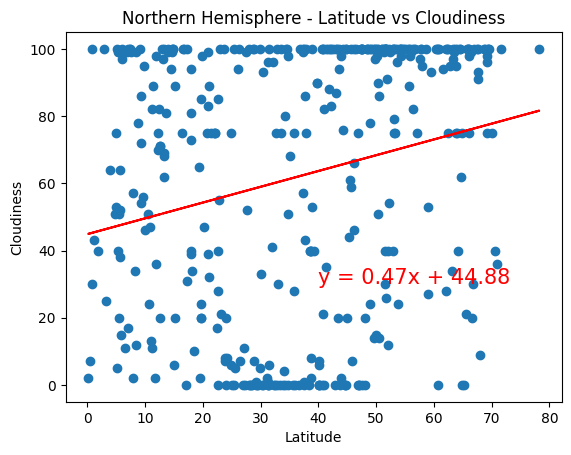

In [26]:
# Northern Hemisphere

x_values = northernHemisphere['Latitude']
y_values = northernHemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/NHLatCloud.png")

plt.show()


The r-squared is: 0.08531915940210034


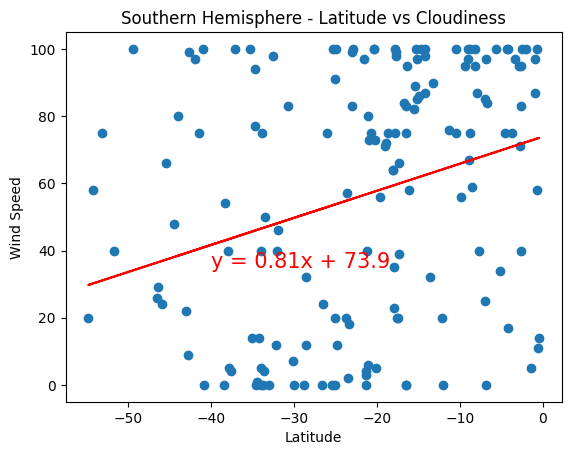

In [27]:
# Southern Hemisphere
x_values = southernHemisphere['Latitude']
y_values = southernHemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/SHLatCloud.png")

plt.show()



**Discussion about the linear relationship:** Latitude does not appear to have a strong correlation to cloudiness.  There isn't a clear visual pattern, and the r-squared value is 0.079 and 0.065).

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.019312321383087732


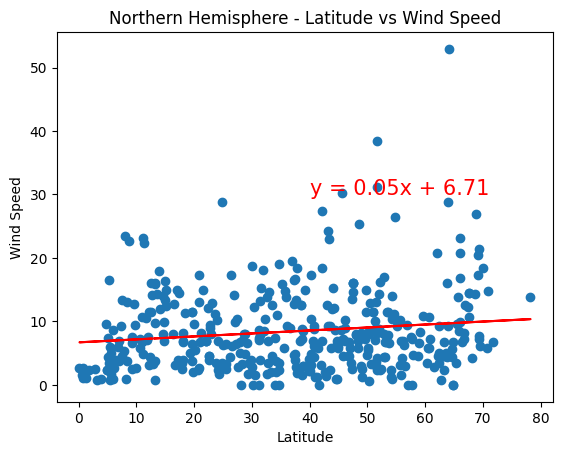

In [28]:
# Northern Hemisphere
x_values = northernHemisphere['Latitude']
y_values = northernHemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/NHLatWS.png")

plt.show()

The r-squared is: 0.05714558466030687


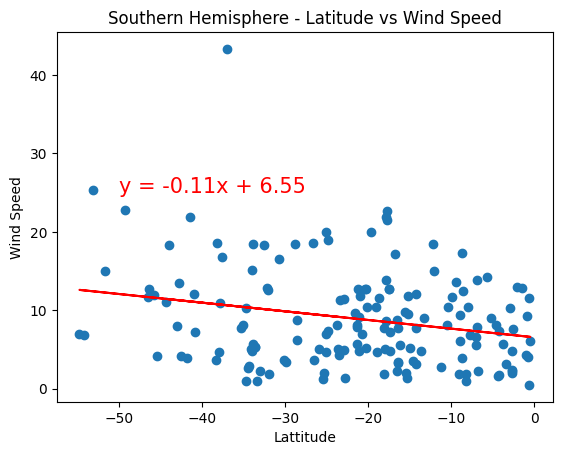

In [29]:
# Southern Hemisphere
x_values = southernHemisphere['Latitude']
y_values = southernHemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/SHLatWSd.png")

plt.show()

**Discussion about the linear relationship:** Wind speed and lattitude do not appear to have a strong correlation.  the slop of the lines are relatively flat, there is a lot of spread between the points, and the r^2 values are very low (0.068 and 0.007).